# Introducing Optimization

In [ ]:
import sys
sys.path.append('../src') 

In [2]:
from Layers.Dense import Dense
from activation.ReLU import Activation_ReLU
from activation.softmax import Activation_Softmax
from loss_function.CategoricalCrossentropy import Loss_CategoricalCrossentropy
import numpy as np
import math
import matplotlib as plt

In [3]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

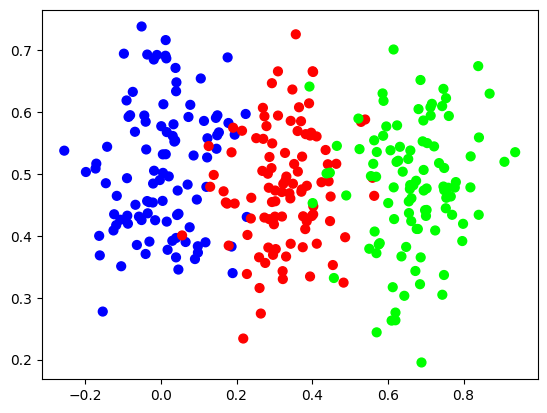

In [4]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [5]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [6]:
# Helper variables
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases =  dense2.biases.copy()

In [7]:
# best_dense1_weights

In [8]:
# best_dense1_biases

In [11]:
for iteration in range(1000):
    # Generate a new a set of weights for iteration
    dense1.weights = 0.05 * np.random.rand(2,3)
    dense1.biases = 0.05 * np.random.rand(1,3)
    dense2.weights = 0.05 * np.random.rand(3,3)
    dense2.biases = 0.05 * np.random.rand(1,3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and return loss
    loss = loss_function.calculate(activation2.outputs,y)

    # Calculate accuracy from output of activation2 and targets
    # Calculate values along first axis
    predictions = np.argmax(activation2.outputs,axis=1)

    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, acc: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases =  dense2.biases.copy()
        lowest_loss =  loss
    # Revert weights and biases
    else:   
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 33, loss: 1.0981689213879868, acc: 0.3333333333333333
